## libraries

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from tabulate import tabulate
sns.set_style('whitegrid')
import sklearn as sk

## import data

In [127]:
train0 = pd.read_csv("train.csv")
test0 = pd.read_csv("test.csv")

In [128]:
train0.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
print(train0.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [130]:
train0.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


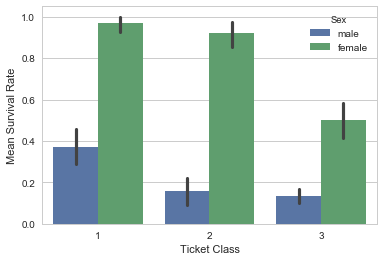

In [131]:
plot = sns.barplot(x="Pclass",y="Survived",hue="Sex",data=train0);
plt.xlabel('Ticket Class')
plt.ylabel('Mean Survival Rate')
plt.savefig("titanicbarplot1.svg", bbox_inches='tight')

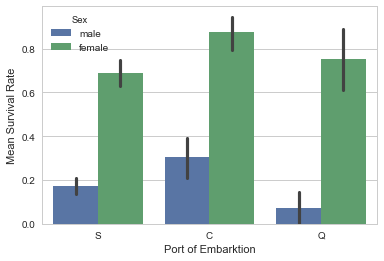

In [132]:
plot = sns.barplot(x="Embarked",y="Survived",hue="Sex",data=train0);
plt.xlabel('Port of Embarktion')
plt.ylabel('Mean Survival Rate')
plt.savefig("titanicbarplot2.svg", bbox_inches='tight')

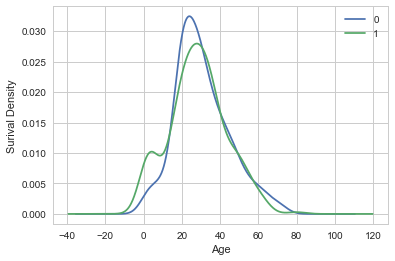

In [133]:
train0.groupby(train0.Survived)['Age'].plot(kind='density',legend=True);
plt.xlabel('Age')
plt.ylabel('Surival Density')
plt.savefig("titanicdensity1.svg", bbox_inches='tight')

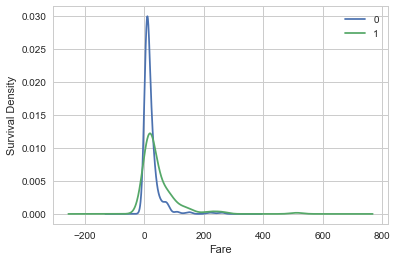

In [134]:
train0.groupby(train0.Survived)['Fare'].plot(kind='density',legend=True);
plt.xlabel('Fare')
plt.ylabel('Survival Density')
plt.savefig("titanicdensity2.svg", bbox_inches='tight')

## Feature engineering

In [135]:
datalist = [train0,test0]
alldata0 = pd.concat(datalist)

In [136]:
alldata0.shape

(1309, 12)

In [137]:
alldata0['title'] = alldata0.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [138]:
alldata0.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [139]:
alldata0.groupby('title').size()

title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
dtype: int64

In [140]:
alldata0['title'] = alldata0['title'].replace(['Mme','Lady','Countess','Capt','Col','Don'\
                                             ,'Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

In [141]:
alldata1 = alldata0.drop(["Ticket","Name","Cabin"],1,)

In [142]:
alldata1['title'] = alldata1['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
alldata1['title'] = alldata1['title'].fillna(0)

alldata1['Sex'] = alldata1['Sex'].map({"male": 1, "Female": 2})
alldata1['Sex'] = alldata1['Sex'].fillna(0)

alldata1["Embarked"] = alldata1['Embarked'].map({"S": 1, "C": 2, "Q": 3})
alldata1['Embarked'] = alldata1['Embarked'].fillna(0)

alldata1['Age'] = alldata1['Age'].fillna(0)
alldata1['Fare'] = alldata1['Fare'].fillna(0)

In [143]:
alldata1.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,title
0,22.0,1.0,7.2500,0,1,3,1.0,1,0.0,1.0
1,38.0,2.0,71.2833,0,2,1,0.0,1,1.0,3.0
2,26.0,1.0,7.9250,0,3,3,0.0,0,1.0,2.0
3,35.0,1.0,53.1000,0,4,1,0.0,1,1.0,3.0
4,35.0,1.0,8.0500,0,5,3,1.0,0,0.0,1.0


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [145]:
random_forest = RandomForestClassifier(n_estimators=100,max_features=3)

In [146]:
train1 = alldata1[~alldata1.Survived.isnull()]
test1 = alldata1[alldata1.Survived.isnull()]

In [147]:
train1.shape, test1.shape

((891, 10), (418, 10))

In [148]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Age            891 non-null float64
Embarked       891 non-null float64
Fare           891 non-null float64
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null float64
SibSp          891 non-null int64
Survived       891 non-null float64
title          891 non-null float64
dtypes: float64(6), int64(4)
memory usage: 76.6 KB


In [149]:
X = train1.drop("Survived",1)
Y = train1["Survived"]
X.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,title
0,22.0,1.0,7.2500,0,1,3,1.0,1,1.0
1,38.0,2.0,71.2833,0,2,1,0.0,1,3.0
2,26.0,1.0,7.9250,0,3,3,0.0,0,2.0
3,35.0,1.0,53.1000,0,4,1,0.0,1,3.0
4,35.0,1.0,8.0500,0,5,3,1.0,0,1.0


In [150]:
random_forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [152]:
testX = test1.drop('Survived',1)
predictions = random_forest.predict(testX)

In [155]:
random_forest.score(X, Y)
#acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
#acc_random_forest

1.0